<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L12_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping as a tool to obtain the sampling distribution of a statistic

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

The data-generating process is exponential with parameter ld

In [297]:
ld = 0.5 #rate parameter
n = 1000 #sample size

## Generate one random sample

In [298]:
x = np.random.exponential(1/ld,(n,)) #this is our sample

## Bootstrapping

In [299]:
B = 10000 #number of bootstrapped samples
Bs = []
for b in range(0,B):
  Bs.append(np.random.choice(x,n,replace=True))


In [300]:
#Bs stores all the bootstrapped samples
Bs = np.asarray(Bs)
Bs.shape

(10000, 1000)

In [301]:
Bs = Bs.transpose()
Bs.shape

(1000, 10000)

## Compute bootstrapped statistic

In [302]:
#statistic of interest
def statistic(x):
  return np.var(x)

In [303]:
#compute statistic on each column using list comprehension
t_boostrapped = [statistic(Bs[:,i]) for i in range(0,B)]

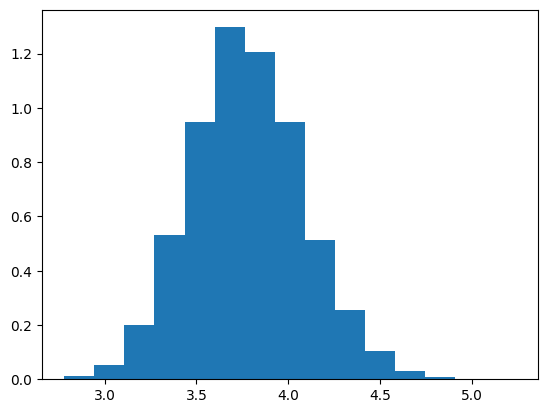

In [304]:
plt.hist(t_boostrapped,bins = 15,density=True)
plt.show()

## Compare with monte-carlo sampling distribution

In [305]:
s = 10000 #number of monte carlo experiments
x_mc = np.random.exponential(1/ld,(n,s))

In [306]:
t_mc = [statistic(x_mc[:,i]) for i in range(0,s)]

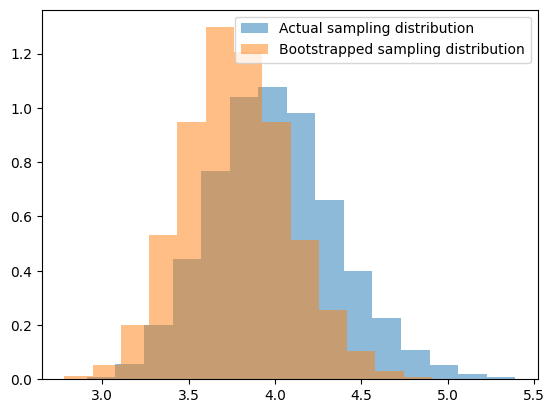

In [307]:
plt.hist(t_mc,bins = 15,density=True, alpha=0.5,label="Actual sampling distribution")
plt.hist(t_boostrapped,bins = 15,density=True, alpha=0.5,label="Bootstrapped sampling distribution")
plt.legend(loc='upper right')
plt.show()

Try different values of sample size and number of bootstraps

## Bootstrapped standard errors

In [308]:
np.std(t_boostrapped)

0.3056418488449242

Compare to Monte carlo standard errors

In [309]:
np.std(t_mc)

0.363413848023756

In [310]:
statistic(x)

3.779432521942113

Bootstrapped confidence interval

In [311]:
np.percentile(t_boostrapped,[2.5,97.5])

array([3.19904366, 4.40834132])

Compare to monte carlo confidence intervals

In [312]:
np.percentile(t_mc,[2.5,97.5])

array([3.33215013, 4.77282771])

Compare to asymptotic standard errors. $\sqrt{n}(s^{2} - \sigma^{2})  \xrightarrow{d} N(0,\mu_{4} - \sigma^{4})$, where $\mu_{4} = E[(X-E[X])^{4}]$, and $\sigma^{4} = Var(X)^{2}$.

In [313]:
np.sqrt((np.mean((x-np.mean(x))**4) - np.var(x)**2)/n)

0.3038358277439489

Compare to finite-sample exact standard errors.

$Var(S^{2}) = \frac{\mu_{4}}{n} - \frac{\sigma^{4} (n-3)}{n(n-1)}$

In [314]:
np.sqrt(np.mean((x-np.mean(x))**4)/n - (np.var(x)**2)*(n-3)/(n*(n-1)))

0.3038828837530071

## Failure of bootstrapping

In [288]:
def statistic(x):
  return np.max(x)

In [341]:
#statistic of interest
def statistic(x):
  return sorted(list(set(x)), reverse=True)[1]

In [335]:
def statistic(x):
  return np.median(x)

In [342]:
#compute statistic on each column using list comprehension
t_boostrapped = [statistic(Bs[:,i]) for i in range(0,B)]

In [343]:
s = 10000 #number of monte carlo experiments
x_mc = np.random.exponential(1/ld,(n,s))
t_mc = [statistic(x_mc[:,i]) for i in range(0,s)]

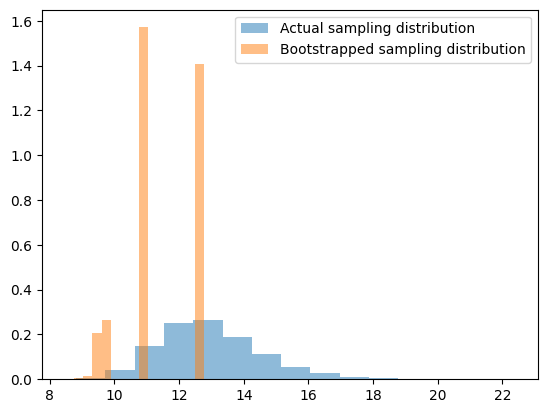

In [344]:
plt.hist(t_mc,bins = 15,density=True, alpha=0.5,label="Actual sampling distribution")
plt.hist(t_boostrapped,bins = 15,density=True, alpha=0.5,label="Bootstrapped sampling distribution")
plt.legend(loc='upper right')
plt.show()

In [345]:
np.percentile(t_boostrapped,[2.5,97.5])

array([ 9.33779628, 12.77916307])

Compare to monte carlo confidence intervals

In [346]:
np.percentile(t_mc,[2.5,97.5])

array([10.40090229, 16.57442514])

# Importance sampling

In [4]:
s = 10000
x = np.random.normal(0,1,(s,))

Calculate $P(X>4)$ using Monte Carlo sampling

In [5]:
np.mean(x>4)

0.0

Using importance sampling, let $g(x) \sim N(4,2)$

In [6]:
x_imp = np.random.normal(4,2,(s,))

In [7]:
#importance weight
w = norm.pdf(x_imp,loc=0,scale=1)/norm.pdf(x_imp,loc=4,scale=np.sqrt(2))

In [8]:
1*(x_imp>4)*w

array([0.00000000e+00, 3.39709292e-06, 0.00000000e+00, ...,
       0.00000000e+00, 7.62877491e-08, 0.00000000e+00])

Monte carlo approximation of P(X>4) with importance sampling

In [9]:
np.mean(1*(x_imp>4)*w)

2.2547555943887225e-05

compare with the actual probability

In [10]:
1-norm.cdf(4,loc=0,scale=1)

3.167124183311998e-05

Example 2: $E[X|X\in [a,b]]$

In [11]:
s = 10000
a = 4
b = 4.5
x = np.random.normal(0,1,(s,))

In [12]:
#monte carlo approximation without importance sampling
np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))

<ipython-input-12-5259dfe9c2d9>:2: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))


nan

In [13]:
#using importance sampling, draw from U[a,b]
x_imp = np.random.uniform(a,b,(s,))

In [14]:
#compute importance weights
f = norm.pdf(x_imp,loc=0,scale=1)/(norm.cdf(b,loc=0,scale=1) - norm.cdf(a,loc=0,scale=1))
g = 1/(b-a)
w = f/g

In [15]:
#monte carlo approximation with importance sampling
np.mean(w*x_imp)

4.163084620656546

In [18]:
#without importance sampling, we would only get accurate results when using many times the samples
s = 1000000
a = 4
b = 4.5
x = np.random.normal(0,1,(s,))
np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))

4.1402288637905444